In [3]:
#1) Učitati skup podataka Bank Marketing (skup podataka i opis atributa se nalazi u prilogu)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\zelja\Desktop\Masinsko ucenje\bank-additional.csv", sep=";")
#promenljiva data-ima ucitane podatke
#pandas paket omogucava ucitavanje paketa, kada ucitavamo sa apsolutne putanje koristimo r""




In [6]:
data.select_dtypes(exclude=['object']).head()#ucitavamo prvih nekoliko redova, metoda tail ucitava poslednjih nekoliko redova

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313
1,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855
2,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962
3,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959
4,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191


In [7]:
data.select_dtypes(include=['object']).head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,5099.1,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,5191,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,5228.1,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,5228.1,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,5195.8,no


In [8]:
i=data[data['nr.employed']=='no']
print(i)
data = data.replace({'nr.employed': {'no': 0}})
#zamenile smo no vrednost ovde sa nulom jer su ovde svi podaci numericki, a pisalo je no, kako bismo mogle dalje da racunamo

     age          job  marital education default housing loan   contact month  \
780   32  blue-collar  married  basic.4y      no      no  yes  cellular   may   

    day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
780         thu  ...       4.0    999       0.0  nonexistent         -1.8   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
780          92.893          1.266     5099.1           no  NaN  

[1 rows x 21 columns]


In [9]:
i=data[data['nr.employed']==0]
print(i)

     age          job  marital education default housing loan   contact month  \
780   32  blue-collar  married  basic.4y      no      no  yes  cellular   may   

    day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
780         thu  ...       4.0    999       0.0  nonexistent         -1.8   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
780          92.893          1.266     5099.1            0  NaN  

[1 rows x 21 columns]


In [10]:
data['nr.employed'].head()

0    5099.1
1      5191
2    5228.1
3    5228.1
4    5195.8
Name: nr.employed, dtype: object

In [11]:
data['nr.employed']=data['nr.employed'].astype('float64')

In [13]:
#2) Analizirati skup podataka

In [14]:
# 2.1 Odrediti tipove podataka atributa

In [12]:
#data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

In [13]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [14]:
data.drop(['contact', 'month', 'day_of_week'], axis = 1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   duration        4116 non-null   float64
 8   campaign        4114 non-null   float64
 9   pdays           4119 non-null   int64  
 10  previous        4117 non-null   float64
 11  poutcome        4119 non-null   object 
 12  emp.var.rate    4116 non-null   float64
 13  cons.price.idx  4117 non-null   float64
 14  cons.conf.idx   4117 non-null   float64
 15  euribor3m       4117 non-null   float64
 16  nr.employed     4118 non-null   float64
 17  y               4118 non-null   o

In [ ]:
# 21 varijabla,7 float tipa, 2 int tipa, 12 object-kategorickog tipa. 4119 instanci-redova-ispitanika

In [16]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000,4118.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993,5165.228485
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456,109.124577
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000,5228.100000


In [100]:
#2.2 Raspodele vrednosti i 2.4 Deskriptivne statistike

In [17]:
data.describe(include=['object'])
#deskriptivna statistika za kategoricke promenljive, nemamo ID prom jer ni jedna nema freq 1

,job,marital,education,default,housing,loan,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4118
unique,12,4,8,3,3,3,3,2
top,admin.,married,university.degree,no,yes,no,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,3523,3667


<AxesSubplot:>

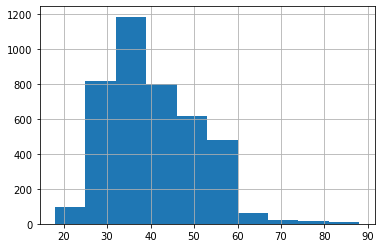

In [18]:
data['age'].hist()

In [19]:
data['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

<AxesSubplot:>

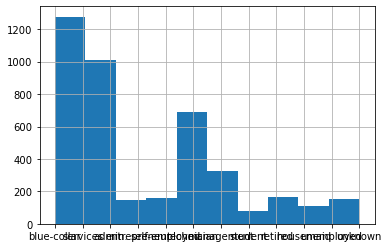

In [20]:
data['job'].hist()

In [106]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

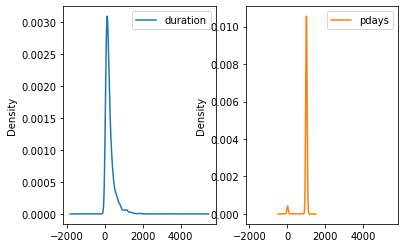

In [21]:
#raspodela numerickih promenljivih, graficki prikaz, ni jedna od promenljivih nema normalnu raspodelu
data[['duration','pdays']].plot(kind='density', layout=(1,2), subplots=True)

<Figure size 576x360 with 0 Axes>

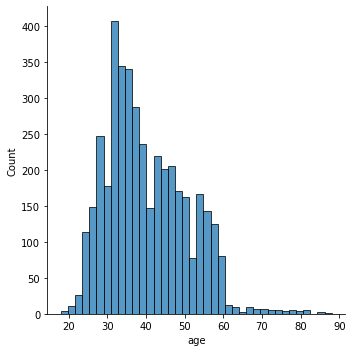

In [22]:
plt.figure(figsize=(8,5))
sns.displot(data['age'])

In [29]:
# Uviđamo da su ispitanici uglavnom ljudi koji se nalaze od kasnih dvadesetih do ranih pedesetih godina, 
# dakle platežno najsposobniji

In [30]:
# 2.3 Nedostajuće vrednosti

In [23]:
data.isna().sum()#popunjavanje nedostajucih vrednosti data=data.fillna(0/data.mean)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

In [24]:
data[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = data[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].fillna(np.mean(data[['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]))

In [25]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 1
dtype: int64

In [26]:
data['y'].unique()

array(['no', 'yes', nan], dtype=object)

In [27]:
#popunjavamo y nan  sa no vrednoscu, jer bolje da stavimo da nece vratiti kredit nego da hoce, pa da pogresimo
data['y']=data['y'].fillna("no")

In [124]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [37]:
# Nedostajuće vrednosti postoje kod varijabli duration, campaign, previous, emp.var.rate, cons.price.idx, 
# cons.conf.idx, euribor3m, nr.employed, sto se vidi i kada pozovemo data.info() da odredjeni rekordi nisu ubrojani kao non-null

In [46]:
# 2.5 Korelacije

<AxesSubplot:>

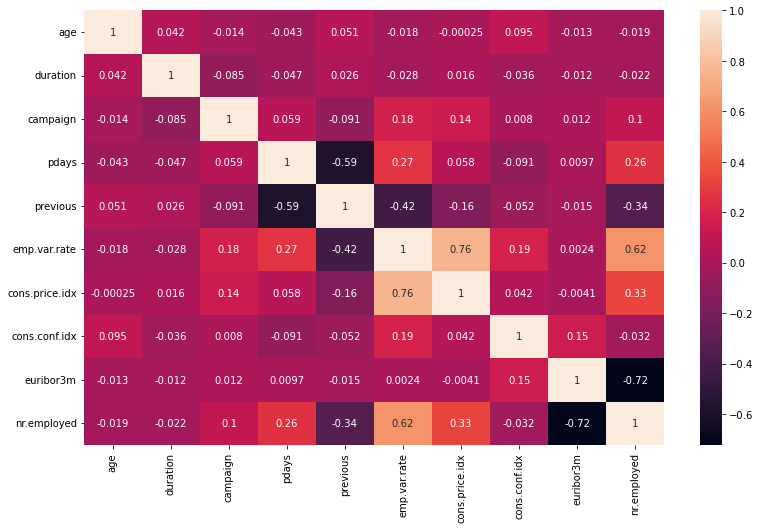

In [28]:
plt.figure(figsize=(13, 8))
sns.heatmap(data[data.describe().columns].corr(), annot=True)

In [52]:
# negativna korelacija izmedju euribor3m i nr.employed ukazuje na to da sa povecanjem broja zaposlenih (nr.empl) opada kamatna stopa
# pozitivna korelacija izmedju stope zaposlenosti (emp var rate) i  indeksa potrosnje (cons price idx) ukazuje na to 
#da kad se poveca stopa zaposlenosti, povecava se i potrosnja

In [55]:
#2.6 Vizualizacije podataka

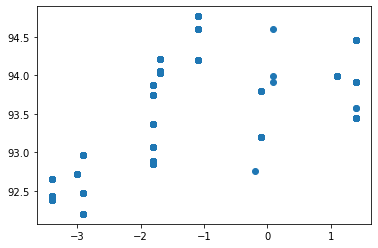

In [29]:
plt.scatter(data['emp.var.rate'], data['cons.price.idx'])

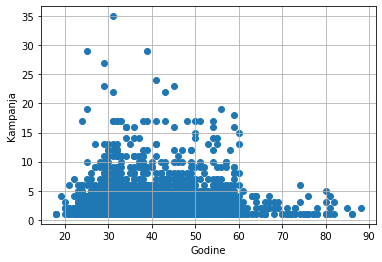

In [30]:
#import matplotlib.pyplot as plt paket za vizualizaciju
age = data['age']
campaign= data['campaign']
fig, ax = plt.subplots(ncols=1, nrows=1)#prikaz vise plotova, ovaj je u 1. redu i 1.koloni
ax.scatter(age, campaign)
ax.set_ylabel("Kampanja")
ax.set_xlabel("Godine")
ax.grid()#mreza
plt.show()
#import matplotlib.pyplot as plt paket za vizualizaciju

In [135]:
# Uparujemo varijable age i campaign i uviđamo da su u cilju sprovođenja kampanje
# najvise su kontaktirani ljudi u tridesetim godinama

In [69]:
# 3) Pripremiti skup podataka tako da bude pogodan za prediktivno modelovanje

In [71]:
# 3.1 Popuniti nedostajuće vrednosti (Odradjeno odmah)

In [31]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   duration        4119 non-null   float64
 8   campaign        4119 non-null   float64
 9   pdays           4119 non-null   int64  
 10  previous        4119 non-null   float64
 11  poutcome        4119 non-null   object 
 12  emp.var.rate    4119 non-null   float64
 13  cons.price.idx  4119 non-null   float64
 14  cons.conf.idx   4119 non-null   float64
 15  euribor3m       4119 non-null   float64
 16  nr.employed     4119 non-null   float64
 17  y               4119 non-null   o

In [77]:
# Kod numeričkih zamenjujemo srednjom vrednošću, kod kategoričkih onom vrednošću koja je većinska

In [101]:
# 3.2 Kvantifikovati kategoričke podatke

In [33]:
data['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [34]:
data['housing'].value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [35]:
data = data.replace({'housing': {'no': 0, 'yes': 1, 'unknown':1}})
#unknown ide u 1 jer je to vecinska pojava klasa
data['housing'].value_counts()


1    2280
0    1839
Name: housing, dtype: int64

In [36]:
data['loan'].value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

In [37]:
data = data.replace({'loan': {'no': 0, 'yes': 1, 'unknown':0}})
data['loan'].value_counts()

0    3454
1     665
Name: loan, dtype: int64

In [128]:
# 3.3 Kreirati izvedene atribute

In [38]:
data2=data.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   duration        4119 non-null   float64
 8   campaign        4119 non-null   float64
 9   pdays           4119 non-null   int64  
 10  previous        4119 non-null   float64
 11  poutcome        4119 non-null   object 
 12  emp.var.rate    4119 non-null   float64
 13  cons.price.idx  4119 non-null   float64
 14  cons.conf.idx   4119 non-null   float64
 15  euribor3m       4119 non-null   float64
 16  nr.employed     4119 non-null   float64
 17  y               4119 non-null   o

In [39]:
data2['MonthlyEstimate'] = data['cons.price.idx'] + data['cons.conf.idx']

In [40]:
data2['MonthlyEstimate'].head()

0    46.693
1    57.594
2    52.665
3    52.665
4    51.200
Name: MonthlyEstimate, dtype: float64

In [41]:
data2['QuarterlyEstimate'] = data['nr.employed'] + data['emp.var.rate']
#bolje ponoziti da dobijemo pozap

In [42]:
data2['QuarterlyEstimate'].head()

0    5097.3
1    5192.1
2    5229.5
3    5229.5
4    5195.7
Name: QuarterlyEstimate, dtype: float64

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4119 non-null   int64  
 1   job                4119 non-null   object 
 2   marital            4119 non-null   object 
 3   education          4119 non-null   object 
 4   default            4119 non-null   object 
 5   housing            4119 non-null   int64  
 6   loan               4119 non-null   int64  
 7   duration           4119 non-null   float64
 8   campaign           4119 non-null   float64
 9   pdays              4119 non-null   int64  
 10  previous           4119 non-null   float64
 11  poutcome           4119 non-null   object 
 12  emp.var.rate       4119 non-null   float64
 13  cons.price.idx     4119 non-null   float64
 14  cons.conf.idx      4119 non-null   float64
 15  euribor3m          4119 non-null   float64
 16  nr.employed        4119 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   duration        4119 non-null   float64
 8   campaign        4119 non-null   float64
 9   pdays           4119 non-null   int64  
 10  previous        4119 non-null   float64
 11  poutcome        4119 non-null   object 
 12  emp.var.rate    4119 non-null   float64
 13  cons.price.idx  4119 non-null   float64
 14  cons.conf.idx   4119 non-null   float64
 15  euribor3m       4119 non-null   float64
 16  nr.employed     4119 non-null   float64
 17  y               4119 non-null   o

In [153]:
# 4) Podelite skup podataka na trening i test podskupove u odnosu 70:30

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #modul za stabla
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
labelencoder_X = LabelEncoder()

In [48]:
data["job"] = labelencoder_X.fit_transform(data["job"])
data["marital"] = labelencoder_X.fit_transform(data["marital"])
data["education"] = labelencoder_X.fit_transform(data["education"])
data["default"] = labelencoder_X.fit_transform(data["default"])
data["poutcome"] = labelencoder_X.fit_transform(data["poutcome"])

for col in data:
    if data[col].dtype == object:
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
#vrsimo kategorizaciju object promenljivih da bismo mogli da izvrsimo normalizaciju svih prom, u suprotnom pravi problem

In [49]:
X = data.drop('y', axis=1) #ulaz
Y = data['y'] #izlaz

skala = MinMaxScaler(feature_range=(0, 1))
normalizovano_X = skala.fit_transform(X)
np.set_printoptions(precision=3)
print(normalizovano_X[0:5,:])

[[1.714e-01 9.091e-02 3.333e-01 2.857e-01 0.000e+00 1.000e+00 0.000e+00
  1.337e-01 2.941e-02 1.000e+00 0.000e+00 5.000e-01 3.333e-01 2.697e-01
  8.835e-02 1.330e-04 9.753e-01]
 [3.000e-01 6.364e-01 6.667e-01 4.286e-01 0.000e+00 0.000e+00 0.000e+00
  9.498e-02 8.824e-02 1.000e+00 0.000e+00 5.000e-01 9.375e-01 6.988e-01
  2.766e-01 8.277e-04 9.929e-01]
 [1.000e-01 6.364e-01 3.333e-01 4.286e-01 0.000e+00 1.000e+00 0.000e+00
  6.231e-02 0.000e+00 1.000e+00 0.000e+00 5.000e-01 1.000e+00 8.823e-01
  1.729e-01 8.487e-04 1.000e+00]
 [2.857e-01 6.364e-01 3.333e-01 2.857e-01 0.000e+00 1.000e+00 0.000e+00
  4.666e-03 5.882e-02 1.000e+00 0.000e+00 5.000e-01 1.000e+00 8.823e-01
  1.729e-01 8.481e-04 1.000e+00]
 [4.143e-01 0.000e+00 3.333e-01 8.571e-01 0.000e+00 1.000e+00 0.000e+00
  1.592e-02 0.000e+00 1.000e+00 0.000e+00 5.000e-01 6.875e-01 3.893e-01
  1.690e-01 6.975e-04 9.938e-01]]


In [50]:
from sklearn.model_selection import train_test_split #paket sa fjom train test spilt gde se deli na test i train dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=10)#vraca 4 promenljive za training i test deo
#uci(fja fit) se na train datasetu

In [189]:
# 5) Kreiranje prediktivnih modela - klasifikacija

In [190]:
# 5.1 Decision tree

In [51]:
from sklearn.metrics import accuracy_score #ocenjivanje tačnosti predviđanja
from sklearn.model_selection import cross_val_score #viseštruko testiranje na različitim trening i test podacima
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
tree_Model = DecisionTreeClassifier(max_depth=5)#jos nismo napravili model, tek kada se pozove fja fit
tree_Model.fit(X_train, Y_train)#model je napravljen i ima dubinu 5-

predictions = tree_Model.predict(X_train)#vraca niz gde je za svaki atribut predvidja njegova vrednost, a stvarna vrednost je u y
print("Accuracy")
print(accuracy_score(Y_train, predictions))#u koliko % slucajeva ce pogoditi sta se desava



#***********************************************
#accuracy_score(Y_test, forest_model.predict(X_test))#mozemo da proverimo da li je trening blizak testu, ako jeste onda nije doslo
#do pretreniranja!
#tacka 5 poslednja crtica



rez = cross_val_score(tree_Model, X_train, Y_train, cv=10, scoring='accuracy')
print("Srednja vrednost i standardna devijacija dobijena kros validacijom ")
print(rez.mean(),rez.std())#prosecna tacnost nakon kros validacije gde se training set pomera u 10 koraka

Accuracy
0.9365244536940687
Srednja vrednost i standardna devijacija dobijena kros validacijom 
0.9073877835447904 0.00970042367997914


In [53]:
print (f"Precision {precision_score(Y_train, predictions)}")
print (f"Recall {recall_score(Y_train, predictions)}")
print (f"F1 {f1_score(Y_train, predictions)}")
confusion_matrix(y_true=Y_train, y_pred=predictions)

Precision 0.8226600985221675
Recall 0.5318471337579618
Recall 0.6460348162475822


array([[2533,   36],
       [ 147,  167]], dtype=int64)

In [209]:
# Metrike ocene klasifikacionog modela su:
# - accuracy: odnos tacno prediktovanih podataka i ukupnog broja podataka
# - precision: odnos ispravno prediktovanih podataka pozitivne klase i zbira svih prediktovanih podataka pozitivne klase
# - recall: odnos ispravno prediktovanih podataka pozitivne klase i zbira podataka koji stvarno pripadaju pozitivnoj klasi
# - f1-score: (2*p*r)/(p+r)

In [201]:
# 5.2 Naivni Bajes

In [54]:
from sklearn.naive_bayes import GaussianNB
gaus_Model = GaussianNB()

gaus_Model.fit(X_train, Y_train)
accuracy_score(Y_train, gaus_Model.predict(X_train))

predictions = gaus_Model.predict(X_train)
print(accuracy_score(Y_train, predictions))

rez = cross_val_score(gaus_Model, X_train, Y_train, cv=10, scoring='accuracy')
print(rez.mean(),rez.std())

0.7807839056538328
0.7800893886966551 0.04606608836687529


In [55]:
print (f"Precision {precision_score(Y_train, predictions)}")
print (f"Recall {recall_score(Y_train, predictions)}")
print (f"Recall {f1_score(Y_train, predictions)}")
confusion_matrix(y_true=Y_train, y_pred=predictions)

Precision 0.30514705882352944
Recall 0.7929936305732485
Recall 0.44070796460177


array([[2002,  567],
       [  65,  249]], dtype=int64)

In [219]:
# 5.3 KNN Klasifikacija

In [56]:
from sklearn.neighbors import KNeighborsClassifier #trazi najslicniji iz proslosti, pa izbacuje razultat
knn_Model = KNeighborsClassifier()

knn_Model.fit(X_train, Y_train)
accuracy_score(Y_train, knn_Model.predict(X_train))

predictions = knn_Model.predict(X_train)
print(accuracy_score(Y_train, predictions))

rez = cross_val_score(knn_Model, X_train, Y_train, cv=10, scoring='accuracy')#
print(rez.mean(),rez.std())

0.9302809573361083
0.9073793733179546 0.01683723828894261


In [57]:
print (f"Precision {precision_score(Y_train, predictions)}")
print (f"Recall {recall_score(Y_train, predictions)}")
print (f"Recall {f1_score(Y_train, predictions)}")
confusion_matrix(y_true=Y_train, y_pred=predictions)

Precision 0.7424892703862661
Recall 0.5509554140127388
Recall 0.6325411334552102


array([[2509,   60],
       [ 141,  173]], dtype=int64)

In [58]:
# Matrica cena
costs = np.array([[0, 8], [2, 0]])
costs
print("Matrica troskova: ")
confusion_matrix(y_true=Y_train, y_pred=predictions) * costs
print(f"Ukupan trosak iznosi {(confusion_matrix(y_true=Y_train, y_pred=predictions) * costs).sum()}")

Matrica troskova: 
Ukupan trosak iznosi 762


In [231]:
# ROC kriva
# - Omogućava nam da odredimo onu klasifikacije koja daje najbolje predikcije
# - Koristimo je kako bismo poredili više različitih prediktivnih modela i pronašli odgovarajući

In [59]:
predictions = knn_Model.predict_proba(X_test)[:, 1] >= 0.8 # Granica je postavljena na 0.8 i vraća vrednost
# true na mestima gde je to ispunjeno
print (f"Precision {precision_score(Y_test, predictions)}")
print (f"Recall {recall_score(Y_test, predictions)}")
print (f"Recall {f1_score(Y_test, predictions)}")
confusion_matrix(y_true=Y_test, y_pred=predictions)


Precision 0.6511627906976745
Recall 0.20437956204379562
Recall 0.3111111111111111


array([[1084,   15],
       [ 109,   28]], dtype=int64)

In [60]:
knn_Model.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ]])

In [236]:
# Iz matrice konfuzije uviđamo da granica od 0.8 daje  malo bolje rezultate

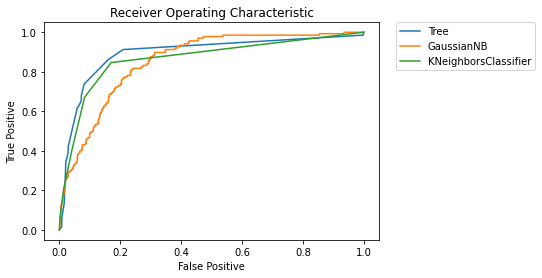

In [246]:
from sklearn.metrics import roc_curve
 
probF = tree_Model.predict_proba(X_test)
pred_probF = probF[:, 1]
 
probG = gaus_Model.predict_proba(X_test)
pred_probG = probG[:, 1]
 
probN = knn_Model.predict_proba(X_test)
pred_probN = probN[:, 1]
 
 
fpr1, tpr1, thresholds = roc_curve(Y_test, pred_probF) 
fpr2, tpr2, thresholds = roc_curve(Y_test, pred_probG) 
fpr3, tpr3, thresholds = roc_curve(Y_test, pred_probN) 

#fpr - false positive rate, treshold - granica
 
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label="Tree")
plt.plot(fpr2, tpr2, label="GaussianNB")
plt.plot(fpr3, tpr3, label="KNeighborsClassifier")
 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [242]:
# Posmatrajući ROC krive sva tri modela, zaključujemo da je klasicna Tree metod najbolji

In [243]:
# Klasterovanje

In [244]:
# 8) Identifikacija i prikaz outliera (ekstremnih vrednosti)

In [246]:
# Normalizacija podataka

In [61]:
data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,487.0,2.0,999,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,346.0,4.0,999,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,227.0,1.0,999,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,0,17.0,3.0,999,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,1,0,58.0,1.0,999,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [62]:
X = data.drop('y', axis=1) #ulaz
Y = data['y'] #izlaz

skala = MinMaxScaler(feature_range=(0, 1))
normalizovani_data = skala.fit_transform(X)
np.set_printoptions(precision=3)
print(normalizovani_data[0:5,:])

[[1.714e-01 9.091e-02 3.333e-01 2.857e-01 0.000e+00 1.000e+00 0.000e+00
  1.337e-01 2.941e-02 1.000e+00 0.000e+00 5.000e-01 3.333e-01 2.697e-01
  8.835e-02 1.330e-04 9.753e-01]
 [3.000e-01 6.364e-01 6.667e-01 4.286e-01 0.000e+00 0.000e+00 0.000e+00
  9.498e-02 8.824e-02 1.000e+00 0.000e+00 5.000e-01 9.375e-01 6.988e-01
  2.766e-01 8.277e-04 9.929e-01]
 [1.000e-01 6.364e-01 3.333e-01 4.286e-01 0.000e+00 1.000e+00 0.000e+00
  6.231e-02 0.000e+00 1.000e+00 0.000e+00 5.000e-01 1.000e+00 8.823e-01
  1.729e-01 8.487e-04 1.000e+00]
 [2.857e-01 6.364e-01 3.333e-01 2.857e-01 0.000e+00 1.000e+00 0.000e+00
  4.666e-03 5.882e-02 1.000e+00 0.000e+00 5.000e-01 1.000e+00 8.823e-01
  1.729e-01 8.481e-04 1.000e+00]
 [4.143e-01 0.000e+00 3.333e-01 8.571e-01 0.000e+00 1.000e+00 0.000e+00
  1.592e-02 0.000e+00 1.000e+00 0.000e+00 5.000e-01 6.875e-01 3.893e-01
  1.690e-01 6.975e-04 9.938e-01]]


In [260]:
# Za identifikaciju outliera koristimo boxplot

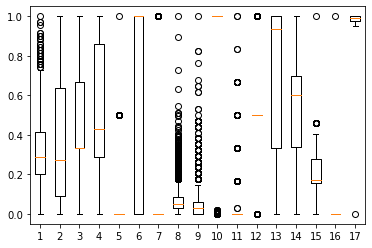

In [64]:
plt.boxplot(normalizovani_data)
plt.show()

In [264]:
# Potrebno je otkloniti outliere

In [275]:
# Koristimo Z score. Ako je Z score veći od 3, vrednost je outlier

In [65]:
from scipy import stats
z = np.abs(stats.zscore(normalizovani_data))
z

array([[9.808e-01, 7.834e-01, 2.919e-01, ..., 1.232e+00, 4.466e-02,
        6.061e-01],
       [1.080e-01, 8.805e-01, 1.358e+00, ..., 8.810e-01, 5.028e-05,
        2.362e-01],
       [1.466e+00, 8.805e-01, 2.919e-01, ..., 2.832e-01, 1.297e-03,
        5.763e-01],
       ...,
       [1.272e+00, 1.158e+00, 1.358e+00, ..., 1.232e+00, 4.414e-02,
        6.061e-01],
       [1.735e+00, 1.061e+00, 2.919e-01, ..., 9.457e-01, 1.348e-03,
        5.763e-01],
       [5.929e-01, 4.854e-02, 1.358e+00, ..., 3.263e-01, 9.307e-03,
        2.802e-01]])

In [66]:
np.where(z>3)

(array([   5,   21,   21,   39,   42,   50,   53,   56,   60,   62,   68,
          68,   79,   83,  128,  129,  140,  143,  150,  150,  150,  153,
         153,  161,  162,  163,  165,  178,  187,  192,  203,  204,  228,
         228,  262,  262,  272,  282,  288,  292,  292,  320,  327,  338,
         340,  340,  345,  381,  405,  420,  420,  425,  425,  447,  448,
         448,  450,  463,  465,  477,  484,  494,  499,  517,  526,  537,
         556,  570,  581,  589,  589,  589,  605,  609,  609,  619,  639,
         658,  658,  672,  673,  685,  688,  695,  695,  696,  696,  696,
         705,  713,  720,  733,  735,  745,  750,  750,  754,  766,  772,
         772,  780,  780,  780,  784,  794,  797,  825,  836,  854,  882,
         886,  903,  905,  911,  911,  947,  947,  955,  965,  965,  971,
         977,  982,  994,  997, 1004, 1022, 1033, 1046, 1046, 1049, 1053,
        1062, 1065, 1080, 1088, 1096, 1096, 1098, 1103, 1115, 1116, 1123,
        1183, 1189, 1190, 1190, 1215, 

In [67]:
no_outliers_data = normalizovani_data[(z <3 ).all(axis = 1)]

In [68]:
type(no_outliers_data)

numpy.ndarray

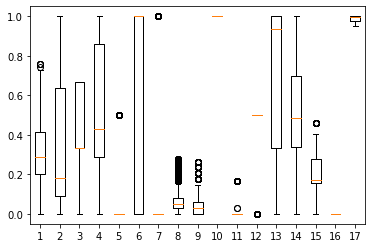

In [69]:
plt.boxplot(no_outliers_data)
plt.show()

In [281]:
# K-means model - inicijalno uzimamo 3 klastera

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100)

In [73]:
kmeans_model = kmeans.fit(no_outliers_data)# Određivanje početnih centroida
centers = kmeans_model.cluster_centers_
print(centers)

[[ 3.121e-01  3.450e-01  3.903e-01  5.353e-01  1.017e-01  2.331e-15
  -4.718e-16  6.602e-02  3.815e-02  1.000e+00  1.586e-02  4.525e-01
   7.604e-01  5.561e-01  1.997e-01  6.254e-04  9.898e-01]
 [ 3.115e-01  3.492e-01  3.876e-01  5.394e-01  1.028e-01  1.000e+00
  -5.551e-16  6.335e-02  3.834e-02  1.000e+00  1.800e-02  4.461e-01
   7.373e-01  5.243e-01  1.924e-01  5.999e-04  9.894e-01]
 [ 3.069e-01  3.437e-01  3.868e-01  5.299e-01  1.066e-01  6.132e-01
   1.000e+00  6.009e-02  3.670e-02  1.000e+00  1.543e-02  4.537e-01
   7.506e-01  5.371e-01  1.955e-01  6.167e-04  9.899e-01]]


In [74]:
# Dodeljivanje slučajeva najbližem centroidu, tj svrstavanje u klaster
klasteri = kmeans_model.predict(no_outliers_data)
klasteri

array([1, 0, 1, ..., 0, 0, 1])

In [75]:
# Centroidi su:
# Prikazivanje centroida
centroidiData = pd.DataFrame(no_outliers_data, columns = ['age','job', 'marital','education', 'default', 'housing', 'loan',
                                                                  'duration', 'campaign', 'pdays',
                                                                 'previous', 'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
centroidiData['Klaster']=klasteri
centroidiData.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Klaster
0,0.171429,0.090909,0.333333,0.285714,0.0,1.0,0.0,0.133681,0.029412,1.0,0.0,0.5,0.333333,0.269680,0.088349,0.000133,0.975326,1
1,0.300000,0.636364,0.666667,0.428571,0.0,0.0,0.0,0.094977,0.088235,1.0,0.0,0.5,0.937500,0.698753,0.276572,0.000828,0.992904,0
2,0.100000,0.636364,0.333333,0.428571,0.0,1.0,0.0,0.062311,0.000000,1.0,0.0,0.5,1.000000,0.882307,0.172858,0.000849,1.000000,1
3,0.285714,0.636364,0.333333,0.285714,0.0,1.0,0.0,0.004666,0.058824,1.0,0.0,0.5,1.000000,0.882307,0.172858,0.000848,1.000000,1
4,0.414286,0.000000,0.333333,0.857143,0.0,1.0,0.0,0.015921,0.000000,1.0,0.0,0.5,0.687500,0.389322,0.169016,0.000697,0.993822,1


In [92]:
centroidiData['Klaster'].unique()

array([1, 0, 2])

In [94]:
centroidiData['Klaster'].value_counts()

1    1678
0    1421
2     605
Name: Klaster, dtype: int64

In [300]:
# Za vizualizaciju K-means modela koristimo linijski graf

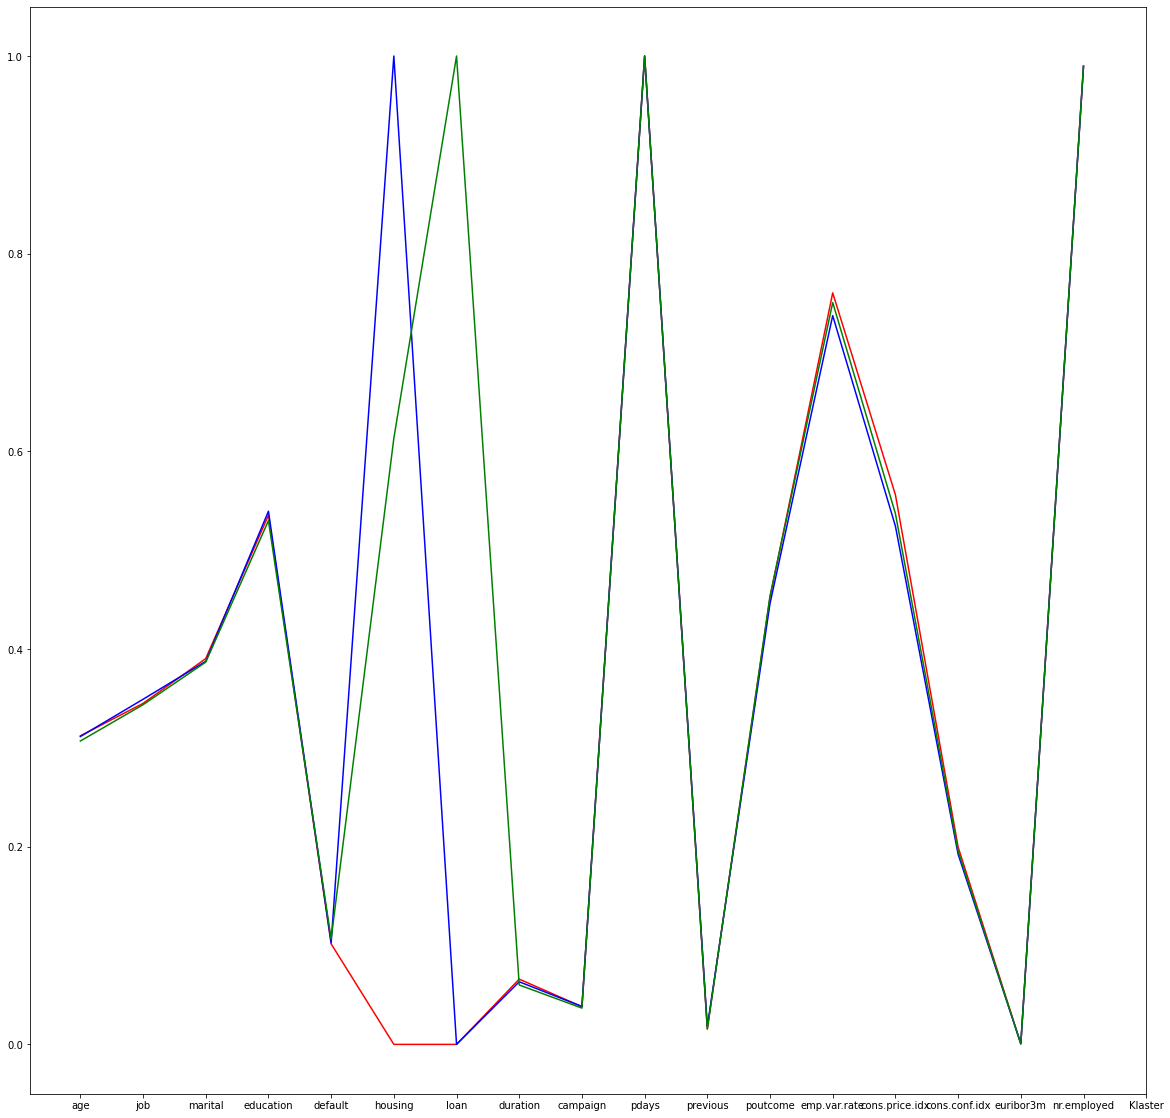

In [77]:
plt.close()
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.plot(centers[2,:], c = 'g')
plt.rcParams['figure.figsize']=[40,40]
plt.xticks(list(range(18)), list(centroidiData.columns))
plt.show()

In [307]:
# Lakat metodom ćemo pokušati da odredimo optimalan broj klastera
# Pre svega, kreiramo krivu koja prikazuje koliko su opservacije podeljene kada imamo različit broj klastera
# Nakon toga, tražimo prelom te krive (lakat) i taj broj uzimamo za optimalan broj klastera

In [80]:
# Kreiranje modela za broj klastera k = 1...10
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(no_outliers_data)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_

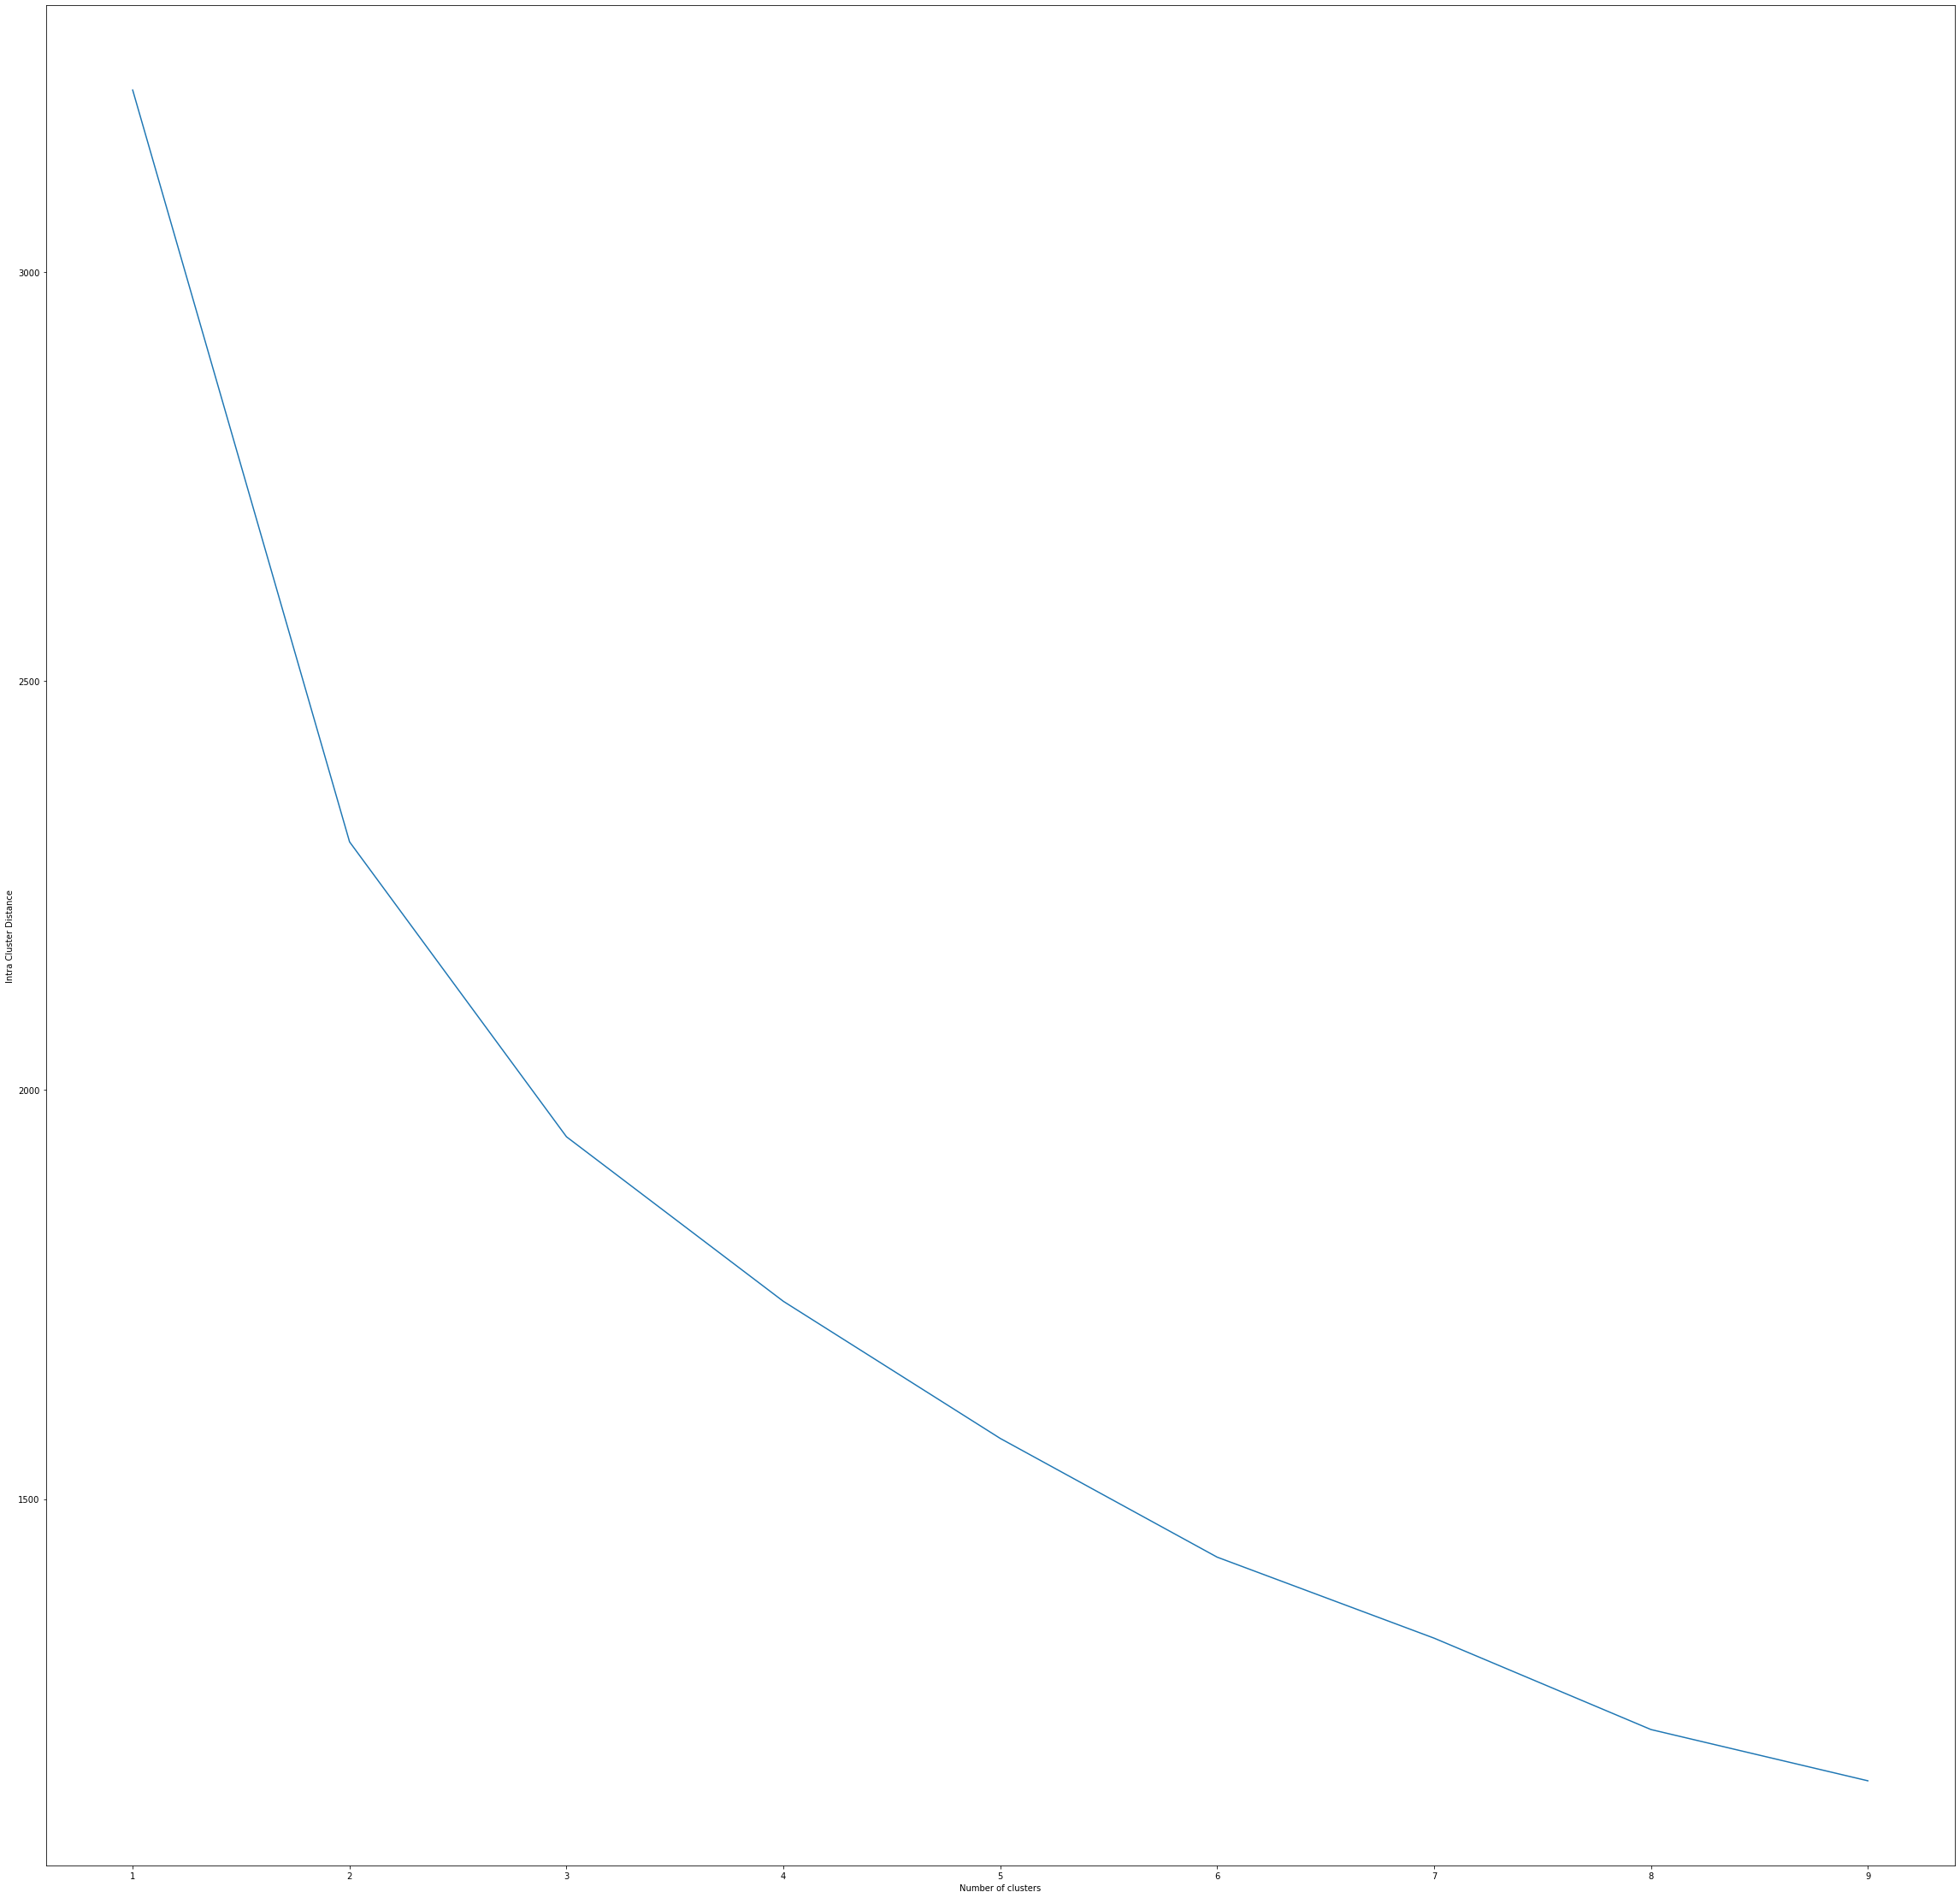

In [81]:
# Plotujemo krivu

plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

In [313]:
# Primećujemo da se kriva najviše lomi kada su opservacije podeljene u 3 klastera i zaključujemo da je to optimalan broj klastera

In [314]:
# Siluet metod
# Kako bismo iskoristili siluet metod za određivannje optimalnog broja klastera, potrebno je da izračunamo siluet koeficijent
# za svaki broj klastera (1-10)
# Vrednost siluet koeficijenta se kreće od -1 do 1 gde je 1 najbolji a -1 najlošiji rezultat

In [82]:
from sklearn.metrics import silhouette_score

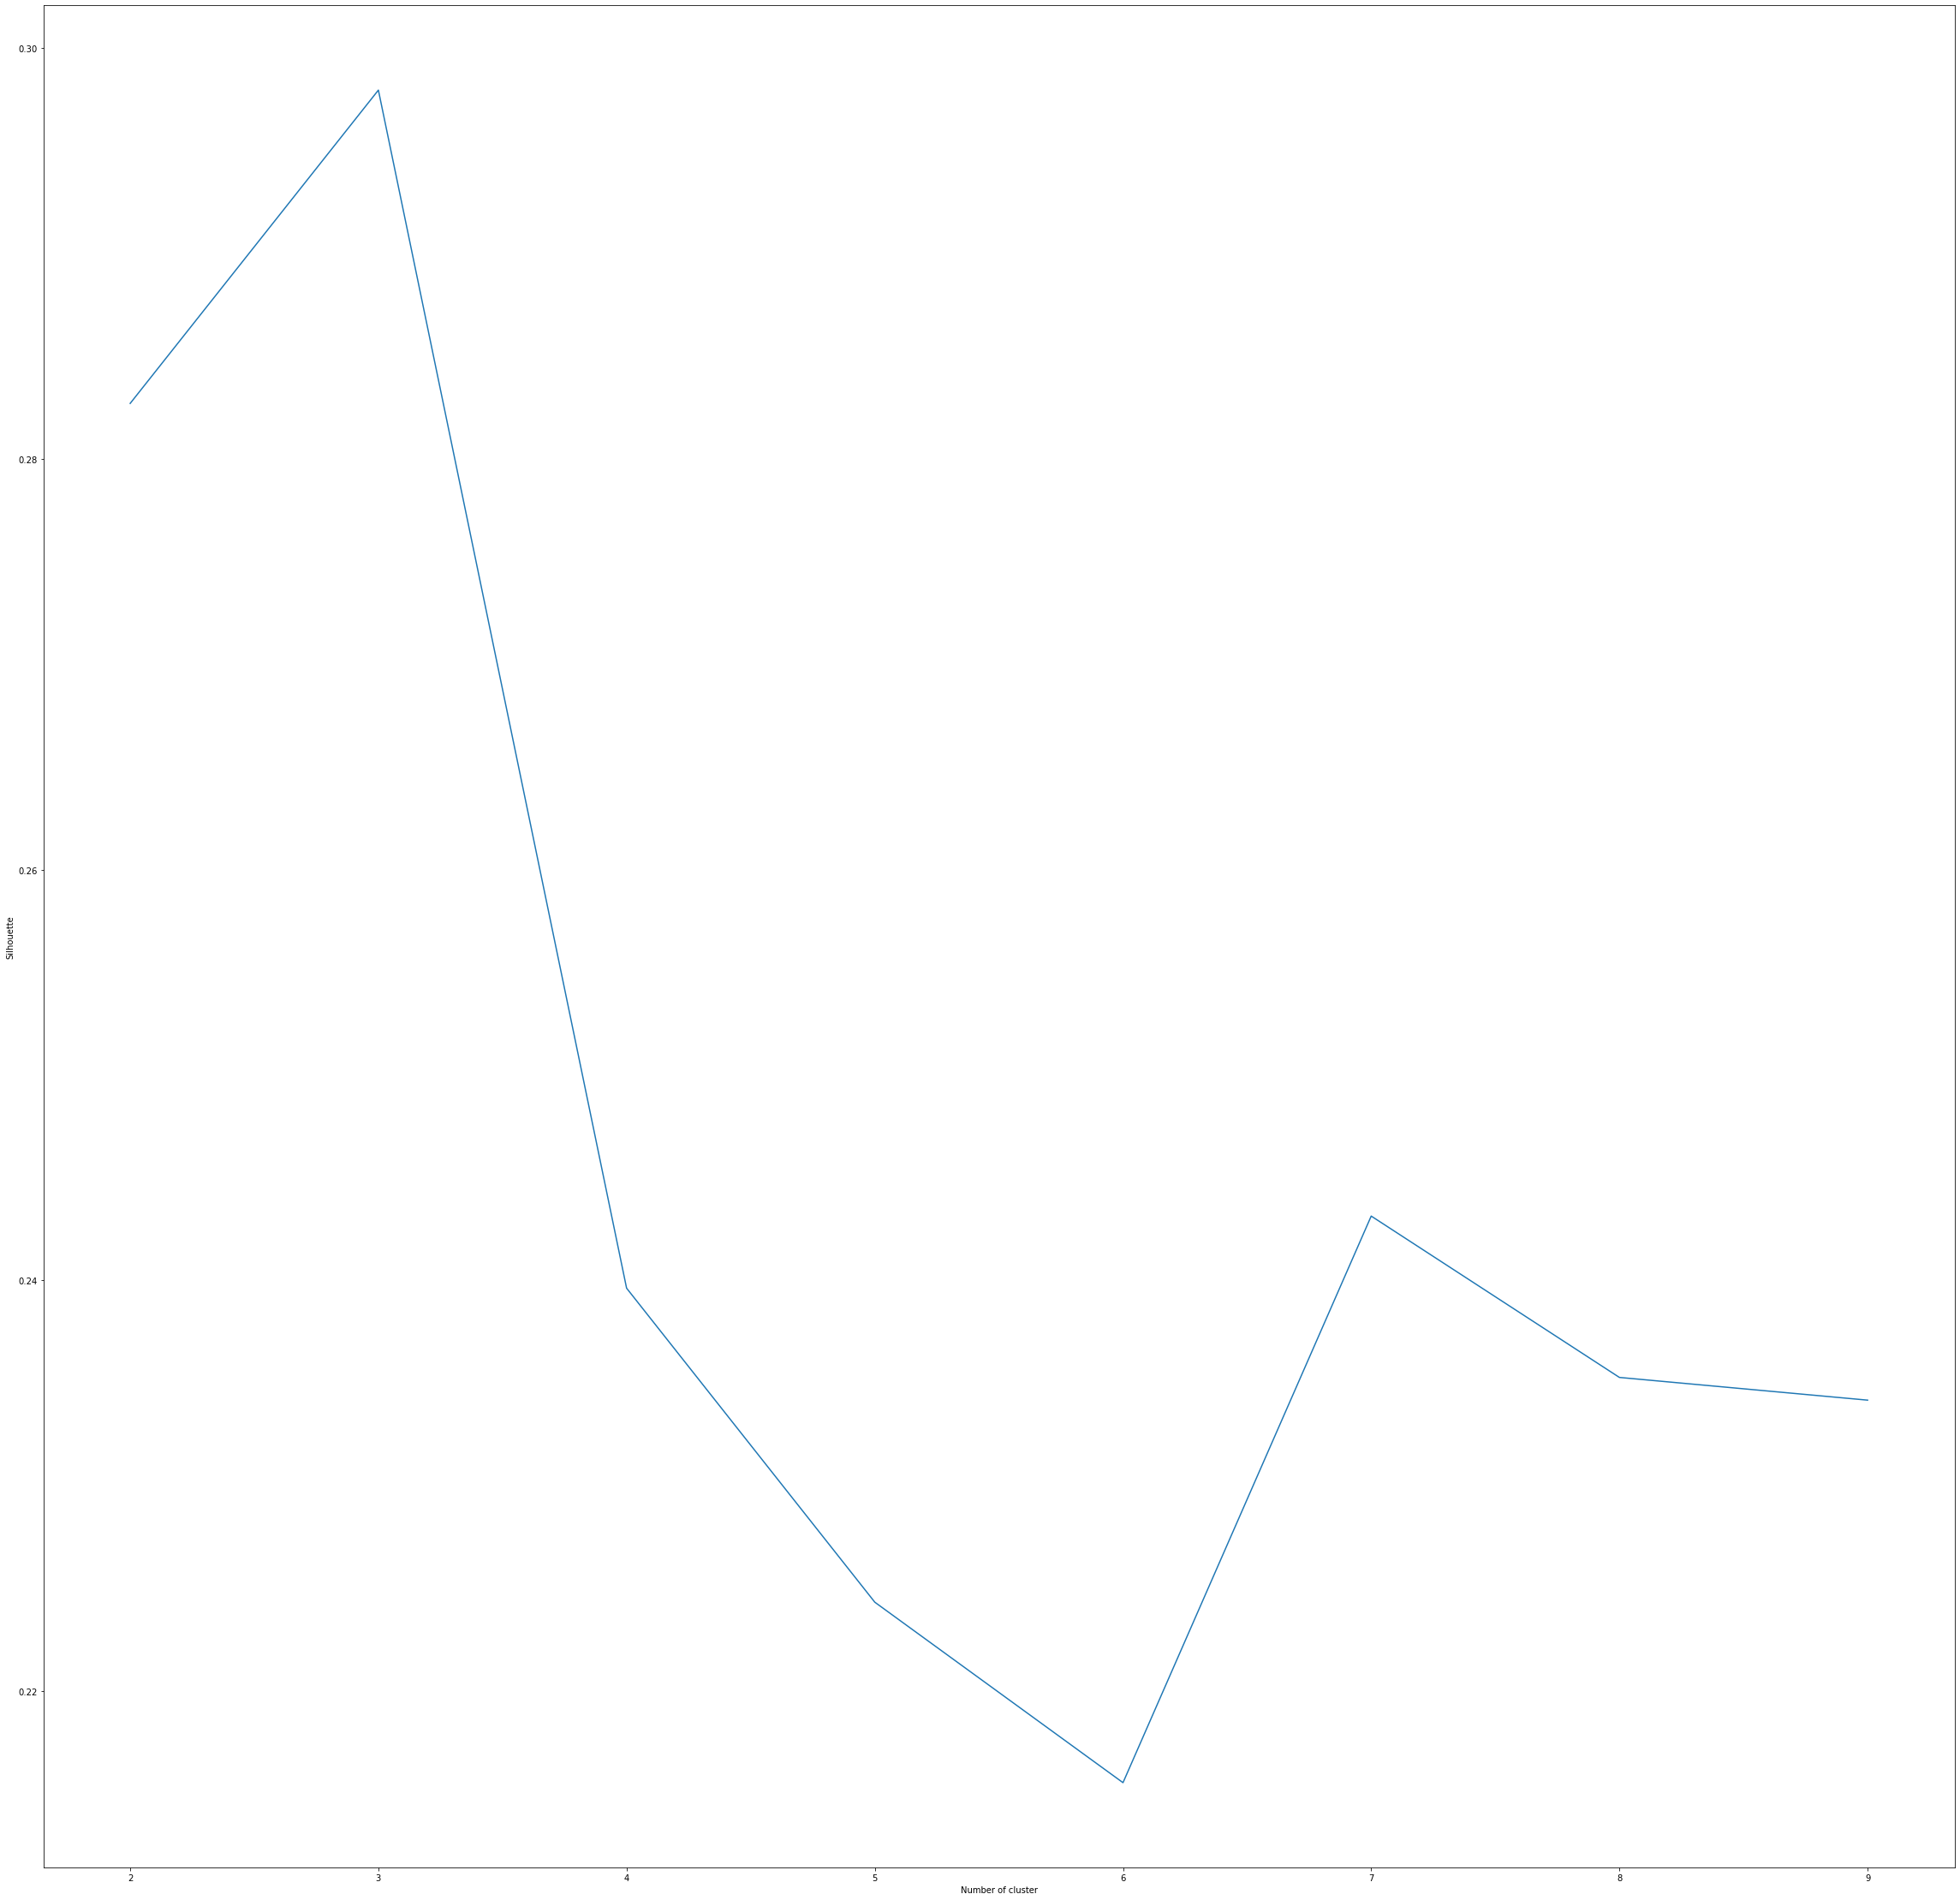

In [83]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(no_outliers_data)
    cluster_labels = kmeans.fit_predict(no_outliers_data)
    sse[k] = silhouette_score(no_outliers_data, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

In [319]:
# Uočavamo da je i prema siluet metodi 3 optimalan broj klastera

In [320]:
# Možemo takođe da računamo siluet faktor za svaku instancu kako bismo uočili i outliere

In [84]:
!pip install scikit-plot

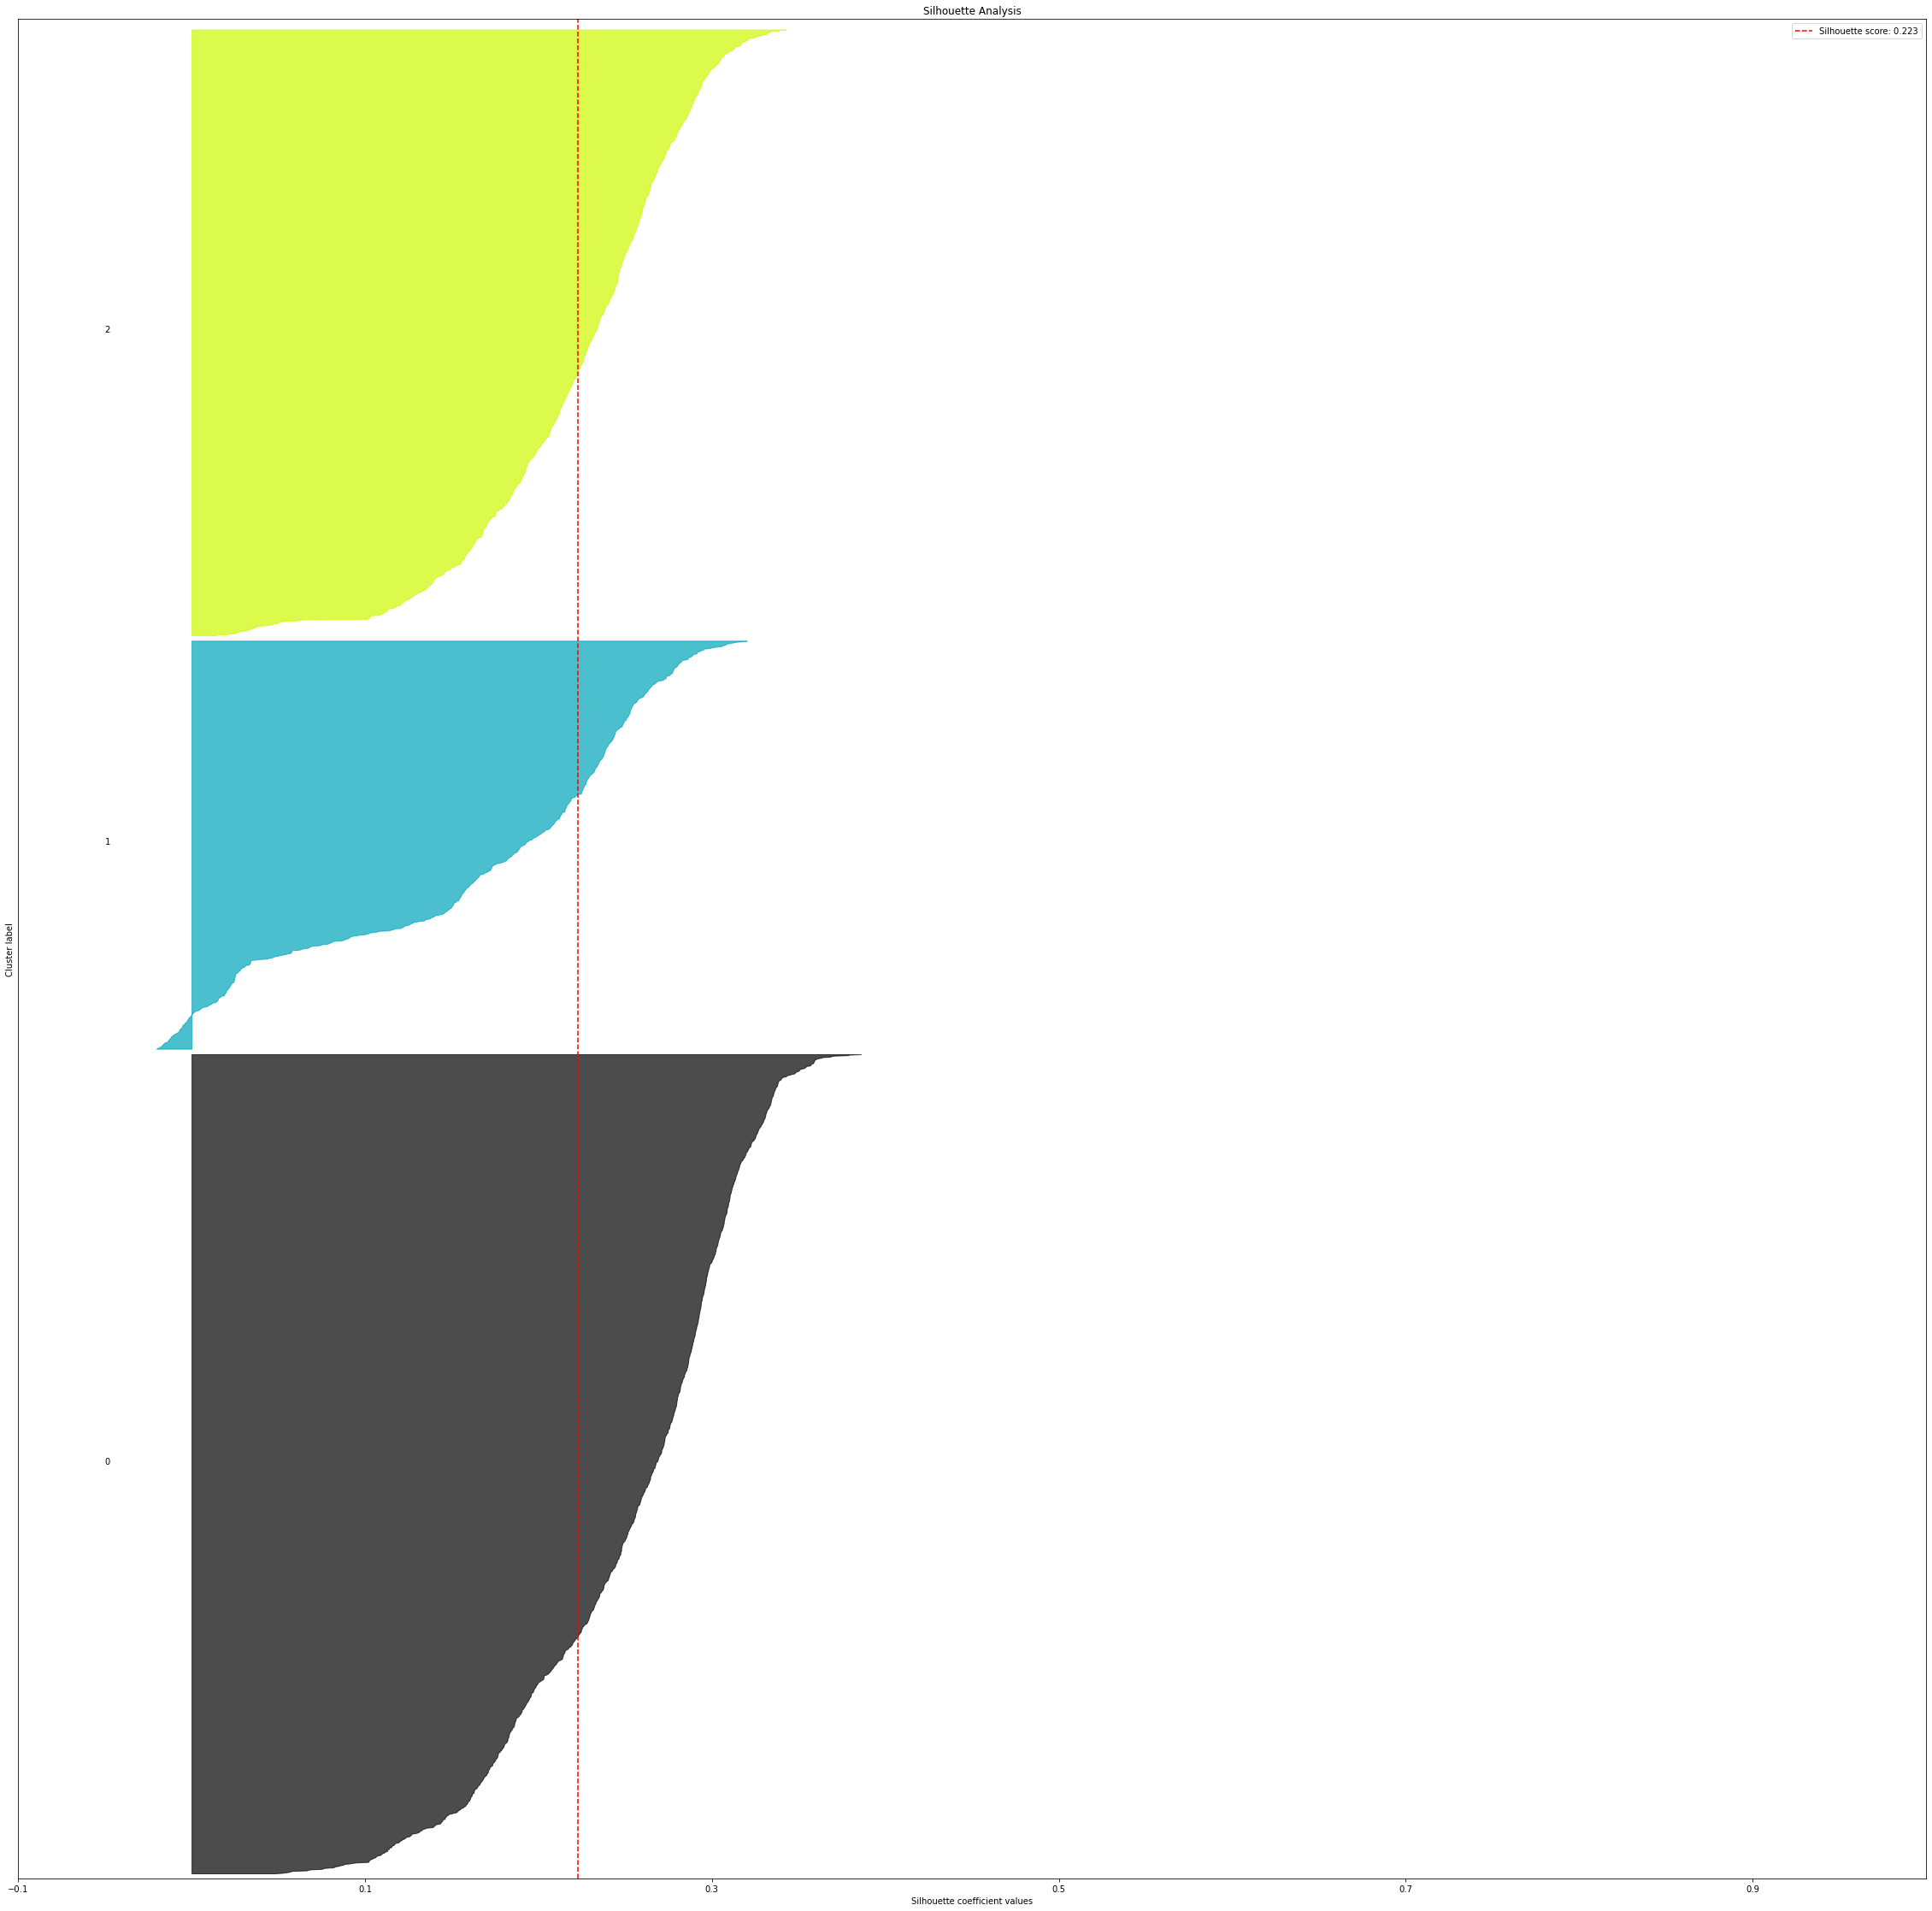

In [88]:
import scikitplot as skplt
cluster_labels = KMeans(n_clusters=3, max_iter=100).fit_predict(no_outliers_data)

skplt.metrics.plot_silhouette(no_outliers_data, cluster_labels)
plt.show()

In [335]:
# Siluet plot nam omogućava da vidimo koliko su opservacije udaljene od centroida klastera kojem pripadaju i
# koliko su udaljene od nekog drugog centroida 
# Budući da kod za k=3 vidimo da je broj opservacija koje su bliske svom klasteru najveći (sa desne strane crvene linije)
# Zaključujemo da je to optimalan broj klastera

In [336]:
# Hijerarhijski klaster model
# - povezuje promenljive i grupe promenljivih u klastere na osnovu međusobne udaljenosti (disperziona matrica)

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [90]:
Z = linkage(no_outliers_data, 'ward') #Koristimo Wardovo rastojanje

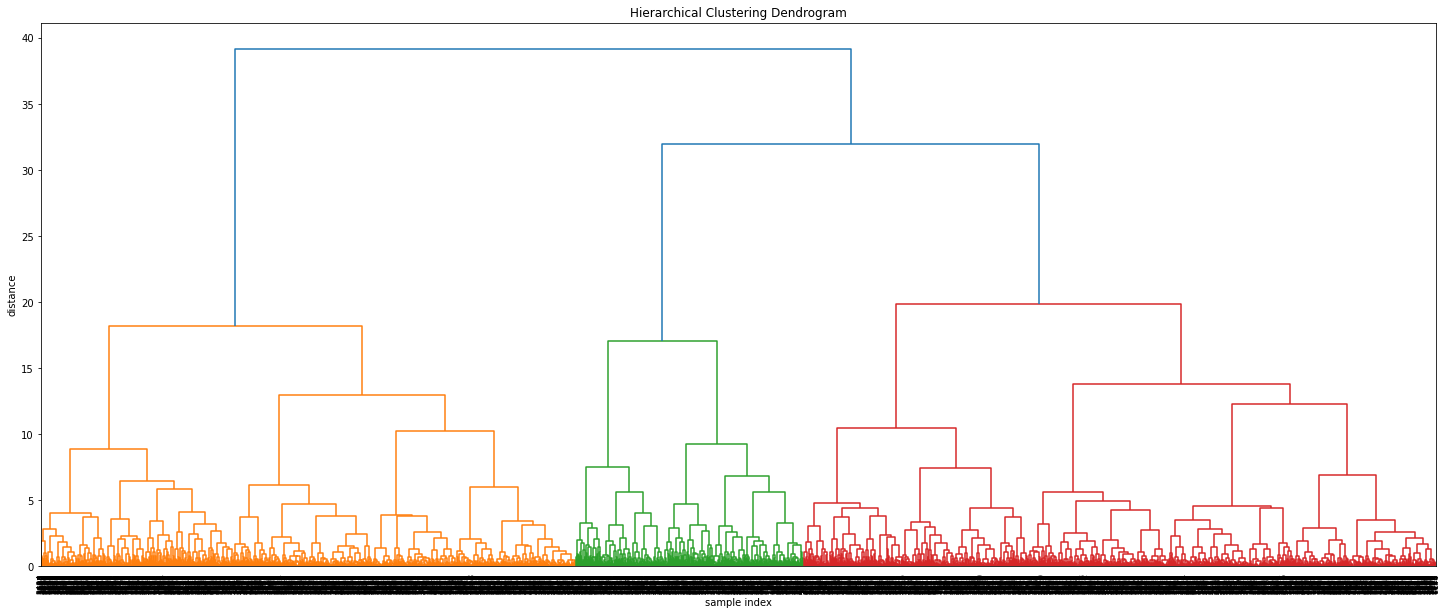

In [91]:
# Plotujemo dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()